# Percent of Courses That are NROable by Department

This notebook shows the percentage of courses that are NROable by department. \
Data analyzed is from the most recent semester. \
Each department is represented by a bar, and the percentage of NROable courses is shown on the y-axis. \
The department average is also shown as a horizontal line.

In [1]:
%pip install -qqq matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from utils.attribute_percent_per_group import *

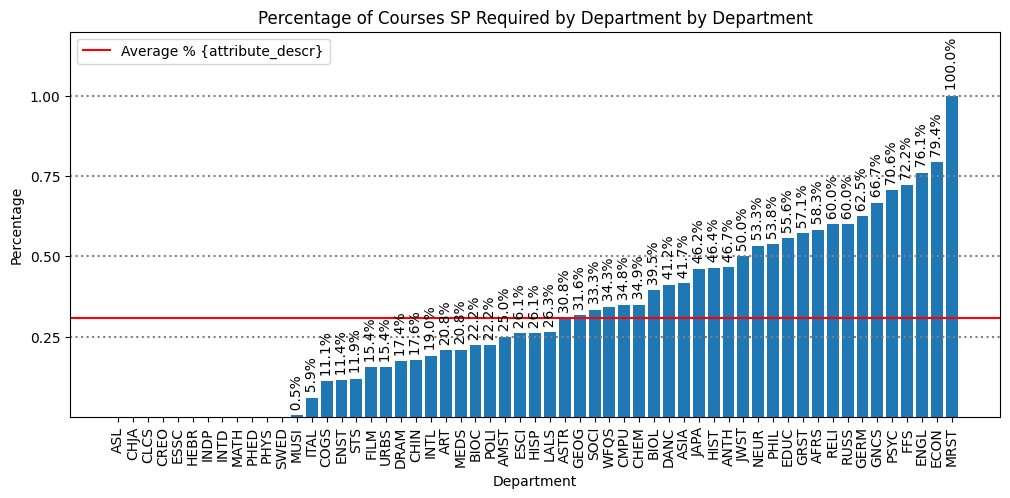

In [3]:
def is_nroable(course) -> bool:
    return course['gm'] == 'NR'

def course_dept(course) -> str:
    return course['dept']

attribute_per_group(is_nroable, course_dept, 'SP Required by Department', 'Department')